# pyradon package demo

Start by importing the simulator module and making a simulator object

In [1]:
import simulator

s = simulator.Simulator()
s.debug_bit = 2


Now let us give the simulator some start and end points. 

run()
makeImage()
find()
SIMULATED : S/N= 55.01 | I= 10.00 | L=  214.6 | th= 72.65 | x0= 176.0
CALCULATED: S/N= 66.13 | I= 10.76 | L=  267.9 | th= 72.85 | x0= 176.0
INPUT: x1=  192 | x2=  256 | y1=   51 | y2=  256
FOUND: x1=  176 | x2=  255 | y1=    0 | y2=  256


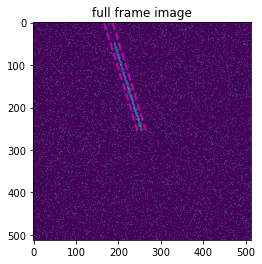

In [2]:
s.x1 = 0.375
s.x2 = 0.5
s.y1 = 0.1
s.y2 = 0.5
s.run()

Looks like it finds the correct coordinates. Lets show it on a plot. 

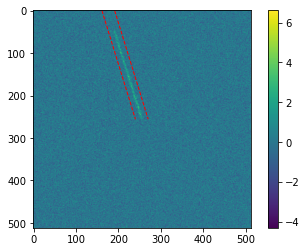

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
streak = s.finder.streaks[0]
offset = 15
plt.figure()
plt.imshow(s.image)
plt.plot([streak.x1-offset, streak.x2-offset], [streak.y1,streak.y2], lw=1, ls='--', color='red')
plt.plot([streak.x1+offset, streak.x2+offset], [streak.y1,streak.y2], lw=1, ls='--', color='red')
plt.colorbar()
plt.show()

What if we have an external image? First we generate it from the Simulator (but it can be a real image)

run()
makeImage()
find()
SIMULATED : S/N= 68.00 | I= 10.00 | L=  327.8 | th= 51.34 | x0= 102.4
CALCULATED: S/N= 81.21 | I= 11.94 | L=  328.0 | th= 51.31 | x0= 102.0
INPUT: x1=  102 | x2=  307 | y1=    0 | y2=  256
FOUND: x1=  102 | x2=  307 | y1=    0 | y2=  256


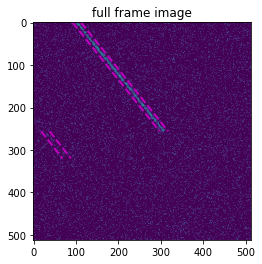

In [4]:
s.x1 = 0.2; s.x2 = 0.6; s.y1 = 0; s.y2 = 0.5; s.run()

Lets create some images from the noiseless "image_conv" in the Simulator.

<IPython.core.display.Javascript object>


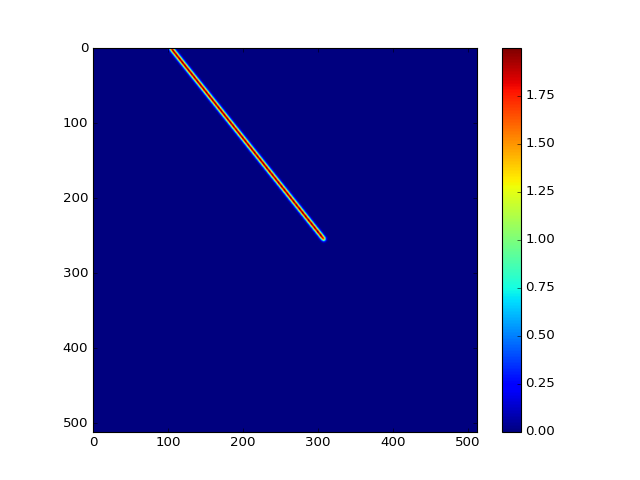

In [5]:
plt.figure()
plt.imshow(s.image_conv)
plt.colorbar();

In [11]:
import numpy as np
I = np.random.normal(103, 2.5, (10,512,512))
I[2,:,:] = I[2,:,:] + s.image_conv

<IPython.core.display.Javascript object>


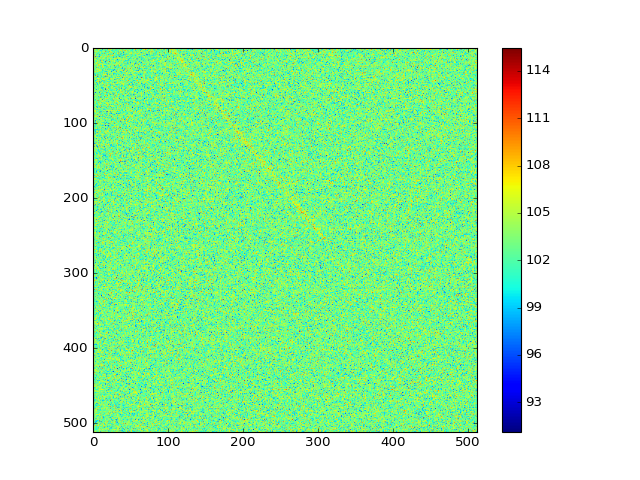

In [12]:
plt.figure()
plt.imshow(I[2,:,:])
plt.colorbar();

We now have 10 noisy images with the line in image number 3.
Now lets put these images into the streak finder:

In [13]:
s.finder.use_exclude = 0
s.finder.use_subtract_mean = 1
s.finder.use_short = 1
s.finder.reset()
s.finder.input(I, psf=2, variance=2.5**2) # note the psf is given as width sigma, and variance of the noise we used. 

running streak detection on batch 0 | frame 0 best S/N found was 4.595800
running streak detection on batch 0 | frame 1 best S/N found was 4.641123
running streak detection on batch 0 | frame 2 best S/N found was 22.785618
running streak detection on batch 0 | frame 3 best S/N found was 4.247307
running streak detection on batch 0 | frame 4 best S/N found was 4.585633
running streak detection on batch 0 | frame 5 best S/N found was 4.006614
running streak detection on batch 0 | frame 6 best S/N found was 4.445449
running streak detection on batch 0 | frame 7 best S/N found was 4.337158
running streak detection on batch 0 | frame 8 best S/N found was 4.382586
running streak detection on batch 0 | frame 9 best S/N found was 4.748677


Note how the S/N of all the frames is below 5, while the streak is detected at S/N=22. Compare with the expected:

In [9]:
s.bg_noise_var = 2.5**2
s.calcSNR()

21.239855026972705

Additional inputs to the Finder.input() method include:  
-filename, batch_num: To keep track of where each streak was found   
-psf: as a scalar (PSF width $\sigma$) or a 2D map   
-variance: a scalar (average background variance) or a 2D map   

Some of the properties of Finder that can be used to improve streak detection:   
-use_subtract_mean=1: each image mean is subtracted, ignoring NaNs (NaNs are then replaced with zeros).   
-use_conv=1: choose if to convolve the image before doing FRT.   
-use_crop=0: reduce the image size (never enlarge). Good for clipping images not in powers of 2.   
-crop_size=2048: what size to crop to. Use a power of 2 as close as possible to image size. Crops the middle of the image.   
-use_short=1: find short streaks.  
-min_length=32: shortest streaks to save (pixels along the horizontal/vertical)  
-threshold=10: in units of S/N.  
-use_recursive=0: apply FRT again and again, subtracting the streaks each time.   
-recursive_depth=10: how many times (per transposition!).   
-use_only_one=1: when not recursive, save only one streak from the two transpositions.   
-subtract_psf_widths=3: how many PSF $\sigma$'s to subtract in each direction of the streak.   
-use_exclde=1: Zeros the central part of the Radon image before finding maxima (gets rif of line-noise).   
-exclude_dx=[-50,50]: horizontal pixel range (in final Radon image; for partial frames uses a relative size).   
-exclude_dy=[]: same as above, for the vertical pixel range.  
-use_save_images=1: saves a copy of the original and Radon image (and subframe). Use 0 to save space.   